### 회귀(Regression)
* 연속형 값 예측(Y값)
* 예) 집값, 매출액

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [20]:
# (pred == y_test).mean() # 연속형 변수이기때문에 실제값과 동일할 수 없다

In [21]:
pred[:3], y_test[:3]

(array([31.88723804, 21.074238  ,  7.50379645]),
 99     33.2
 67     22.0
 437     8.7
 Name: MEDV, dtype: float64)

### 회귀분석 평가지표
* MSE (Mean Squared Error)
  - 예측한 값과 실제값의 차이를 제곱한 평균
* MAE (Mean Absolute Error)
  - 예측한 값과 실제값의 차이의 절대값을 평균낸 것
* RMSE (Root Mean Squared Error)
  - MSE값에 루트를 씌운 값


In [22]:
y_ = np.array([3,4,5])
y = np.array([1,2,3])

In [23]:
# MSE
def mse(y_, y) :
    return ((y_-y)**2).mean()

In [24]:
mse(y_, y)

4.0

In [25]:
# MAE
def mae(y_, y):
    return np.abs(y_-y).mean()

In [26]:
mae(y_, y)

2.0

In [27]:
# RMSE
def rmse(y_, y):
    return np.sqrt(((y_-y)**2).mean())

In [28]:
rmse(y_,y)

2.0

In [29]:
# 사이킷런 - MAE, MSE는 이미 구현이 되어있음
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_, y), mean_squared_error(y_, y)

(2.0, 4.0)

In [30]:
mean_squared_error(pred, y_test)

23.244076604986653

In [31]:
mean_absolute_error(pred, y_test)

3.216795128525839

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

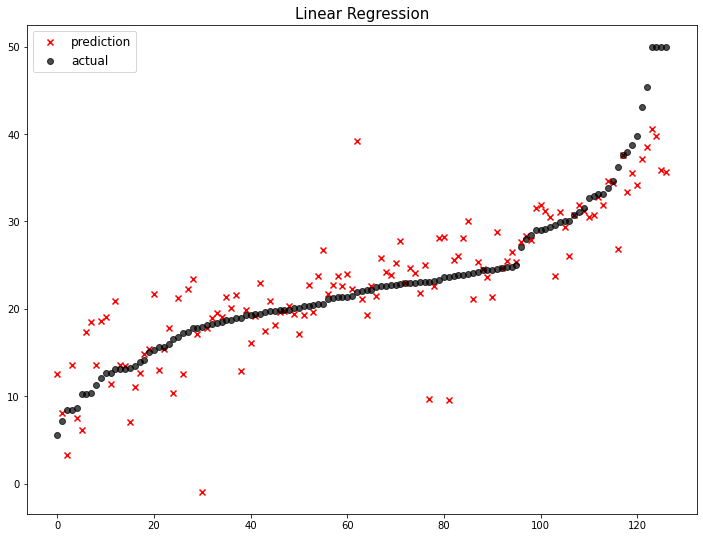

               model        mse
0  Linear Regression  23.244077


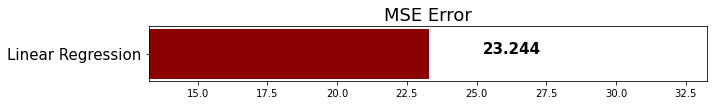

In [33]:
mse_eval('Linear Regression', pred, y_test) # 한꺼번에 비교값을 보기 위함

### Regularization (규제)
* 과적합을 줄이기 위해 페널티를 부여

#### L1 규제
* 가중치의 합을 더한 값에 규제강도를 곱함
* 더한 값이 0이 되는 문제가 있음
* MSE + a|w|
* Lasso (라쏘)

#### L2 규제
* 가중치 제곱의 합에 규제강도를 곱함
* 규제강도가 커지면 가중치 감소, 규제강도가 작아지면 가중치는 증가함
* MSE + aw**2
* Ridge (릿지)

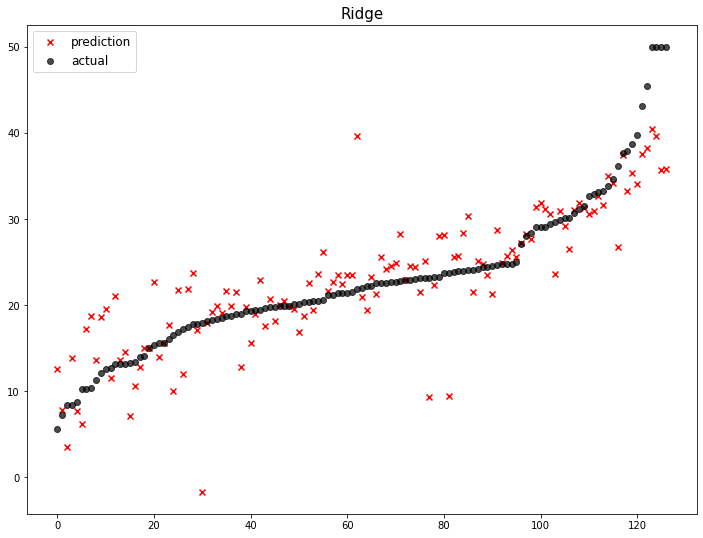

               model        mse
0              Ridge  24.148842
1  Linear Regression  23.244077


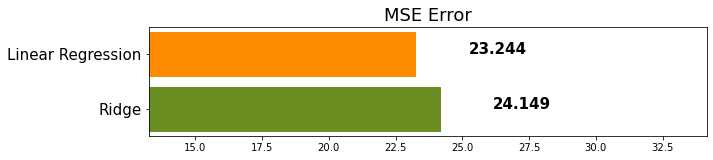

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge', pred, y_test)

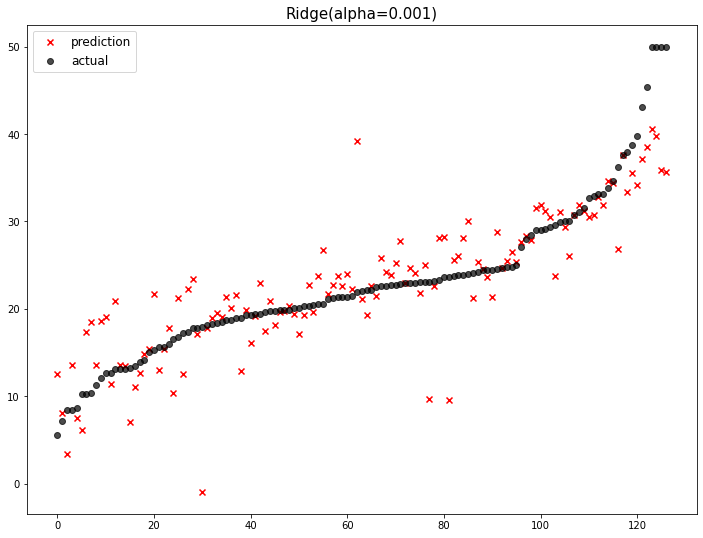

                model        mse
0               Ridge  24.148842
1  Ridge(alpha=0.001)  23.245612
2   Linear Regression  23.244077


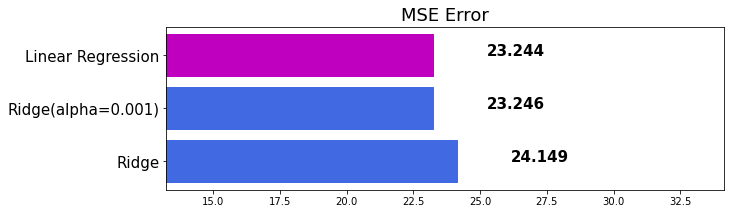

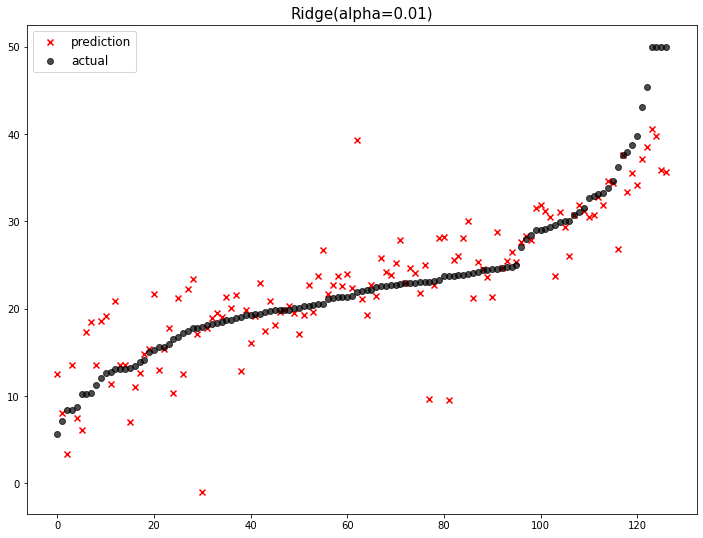

                model        mse
0               Ridge  24.148842
1   Ridge(alpha=0.01)  23.259342
2  Ridge(alpha=0.001)  23.245612
3   Linear Regression  23.244077


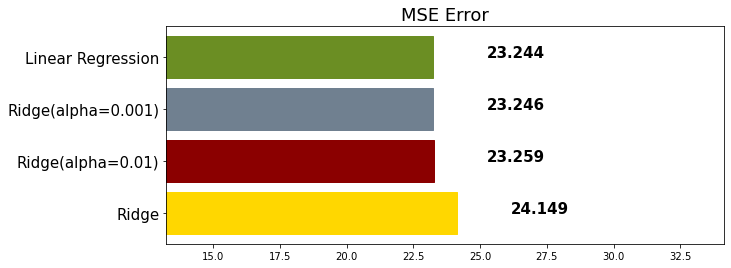

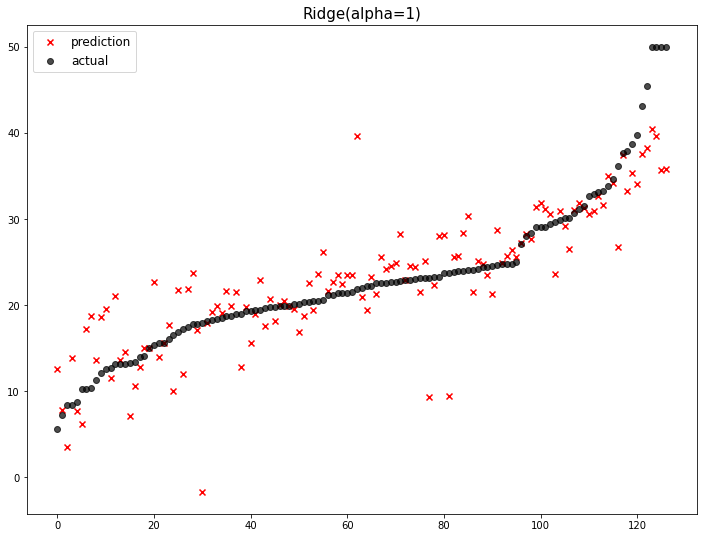

                model        mse
0               Ridge  24.148842
1      Ridge(alpha=1)  24.148842
2   Ridge(alpha=0.01)  23.259342
3  Ridge(alpha=0.001)  23.245612
4   Linear Regression  23.244077


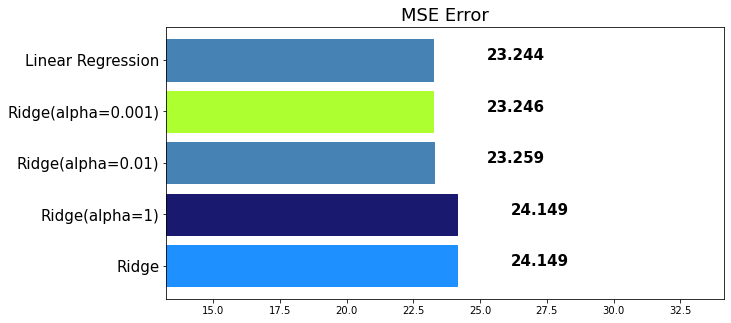

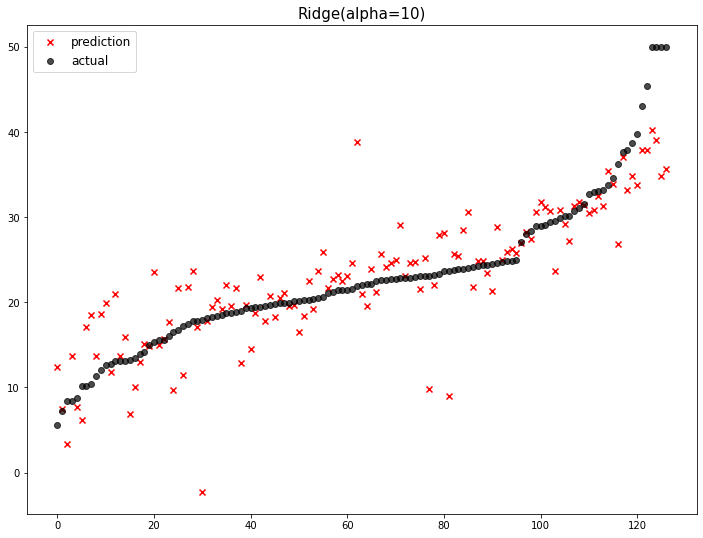

                model        mse
0     Ridge(alpha=10)  24.973956
1               Ridge  24.148842
2      Ridge(alpha=1)  24.148842
3   Ridge(alpha=0.01)  23.259342
4  Ridge(alpha=0.001)  23.245612
5   Linear Regression  23.244077


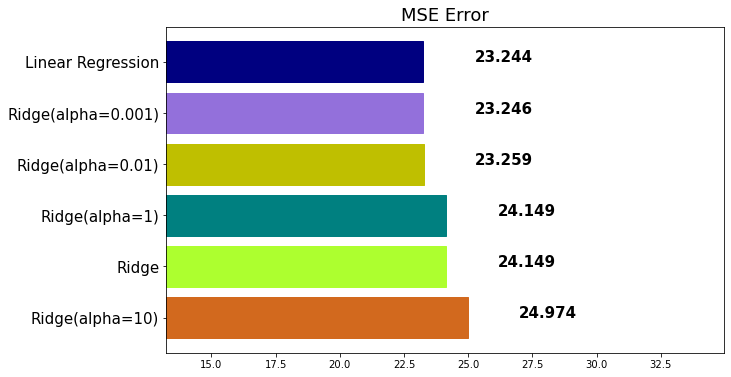

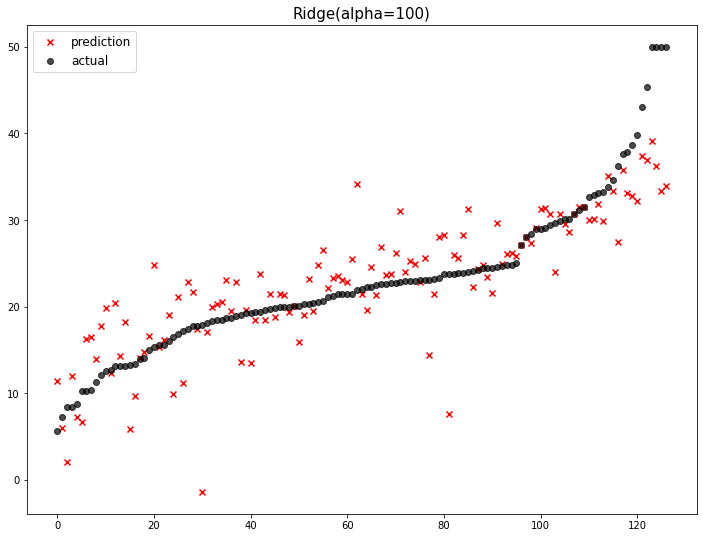

                model        mse
0    Ridge(alpha=100)  25.949184
1     Ridge(alpha=10)  24.973956
2               Ridge  24.148842
3      Ridge(alpha=1)  24.148842
4   Ridge(alpha=0.01)  23.259342
5  Ridge(alpha=0.001)  23.245612
6   Linear Regression  23.244077


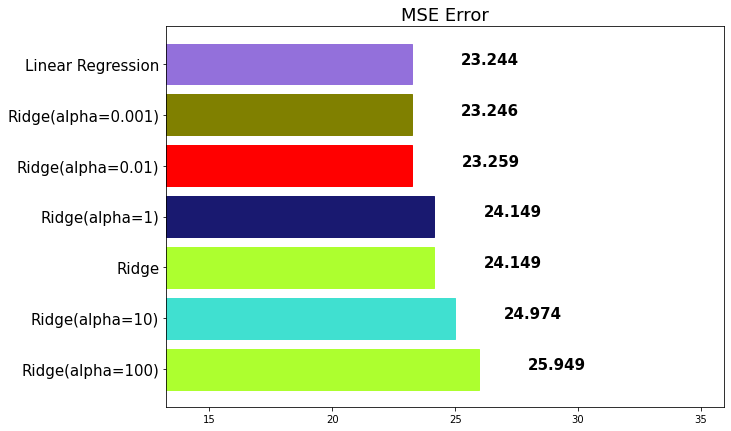

In [35]:
alpha = [0.001, 0.01, 1, 10, 100]
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval(f'Ridge(alpha={a})', pred, y_test)

In [36]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

In [37]:
# 가중치 벡터
ridge.coef_

array([-0.06120825,  0.04395641,  0.04457171,  2.89270899, -6.56085709,
        4.00639243, -0.00723499, -1.18446987,  0.25907495, -0.01152277,
       -0.8612284 ,  0.01458851, -0.59210977])

In [38]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [39]:
pd.DataFrame(list(zip(x_train.columns, ridge.coef_))).sort_values(by=1)

,0,1
4,NOX,-6.560857
7,DIS,-1.184470
10,PTRATIO,-0.861228
12,LSTAT,-0.592110
0,CRIM,-0.061208
9,TAX,-0.011523
6,AGE,-0.007235
11,B,0.014589
1,ZN,0.043956
2,INDUS,0.044572


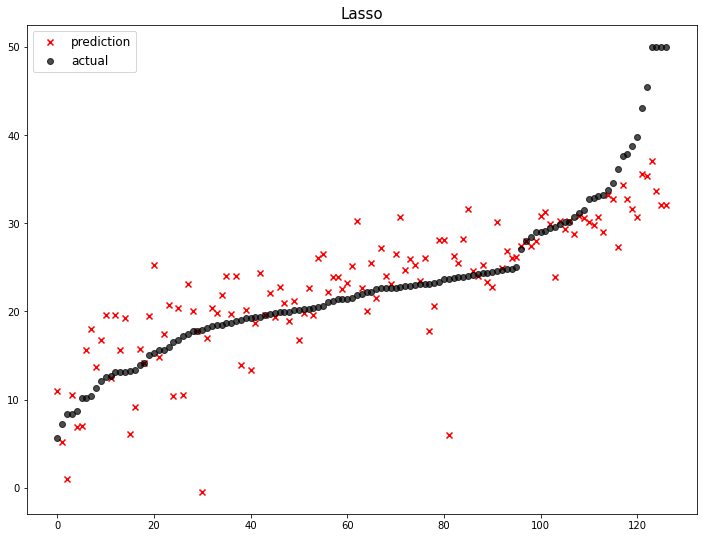

                model        mse
0               Lasso  28.727972
1    Ridge(alpha=100)  25.949184
2     Ridge(alpha=10)  24.973956
3               Ridge  24.148842
4      Ridge(alpha=1)  24.148842
5   Ridge(alpha=0.01)  23.259342
6  Ridge(alpha=0.001)  23.245612
7   Linear Regression  23.244077


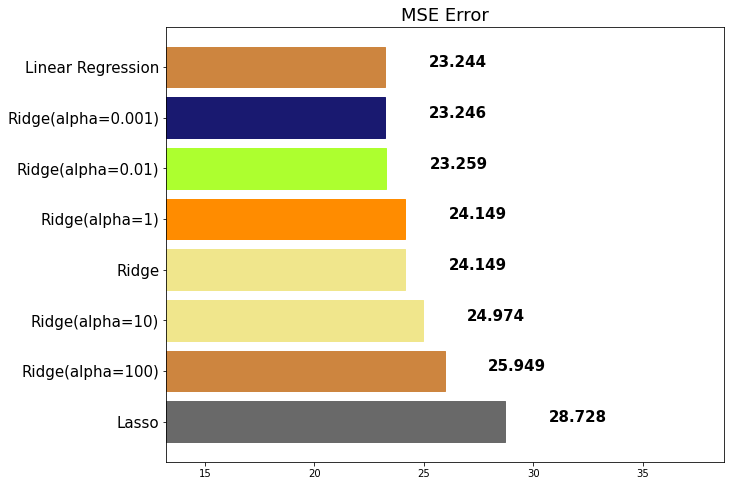

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso', pred, y_test)

In [41]:
lasso.coef_

array([-0.02444252,  0.04507126,  0.        ,  0.        , -0.        ,
        0.77497292,  0.0286414 , -0.62777617,  0.23280432, -0.01251523,
       -0.80916944,  0.01162097, -0.82739108])

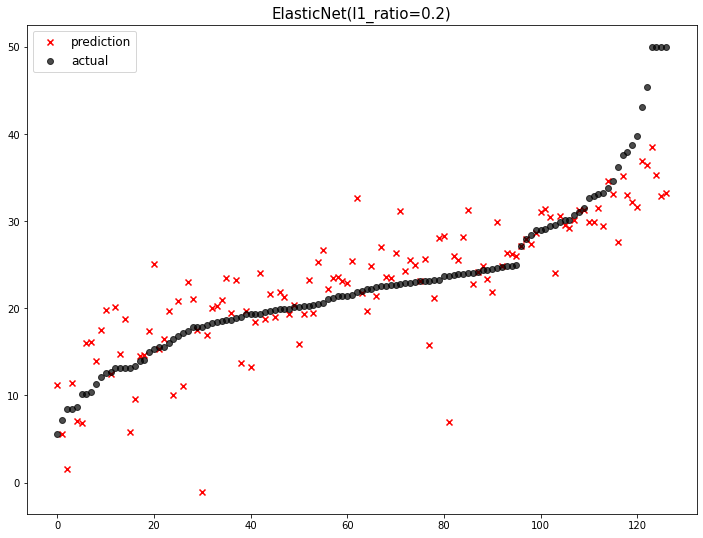

                      model        mse
0                     Lasso  28.727972
1  ElasticNet(l1_ratio=0.2)  26.707041
2          Ridge(alpha=100)  25.949184
3           Ridge(alpha=10)  24.973956
4                     Ridge  24.148842
5            Ridge(alpha=1)  24.148842
6         Ridge(alpha=0.01)  23.259342
7        Ridge(alpha=0.001)  23.245612
8         Linear Regression  23.244077


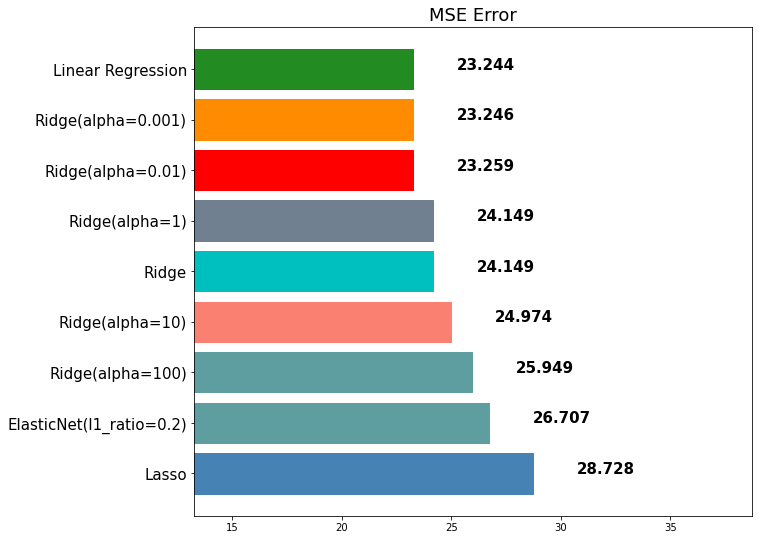

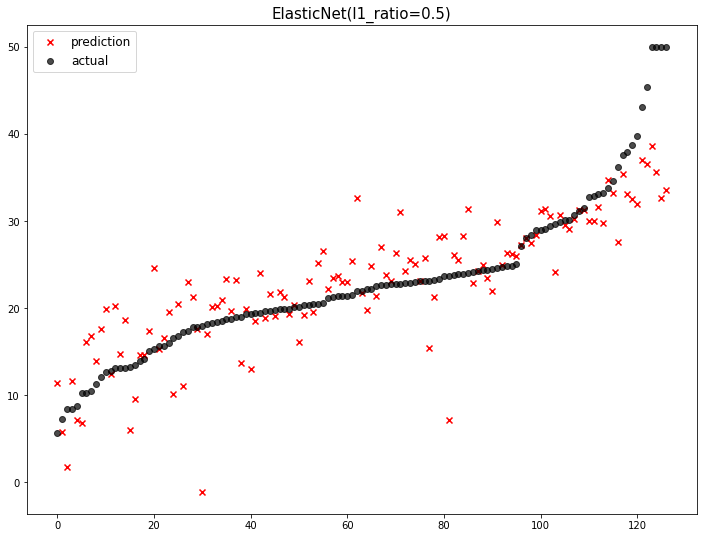

                      model        mse
0                     Lasso  28.727972
1  ElasticNet(l1_ratio=0.2)  26.707041
2  ElasticNet(l1_ratio=0.5)  26.450901
3          Ridge(alpha=100)  25.949184
4           Ridge(alpha=10)  24.973956
5                     Ridge  24.148842
6            Ridge(alpha=1)  24.148842
7         Ridge(alpha=0.01)  23.259342
8        Ridge(alpha=0.001)  23.245612
9         Linear Regression  23.244077


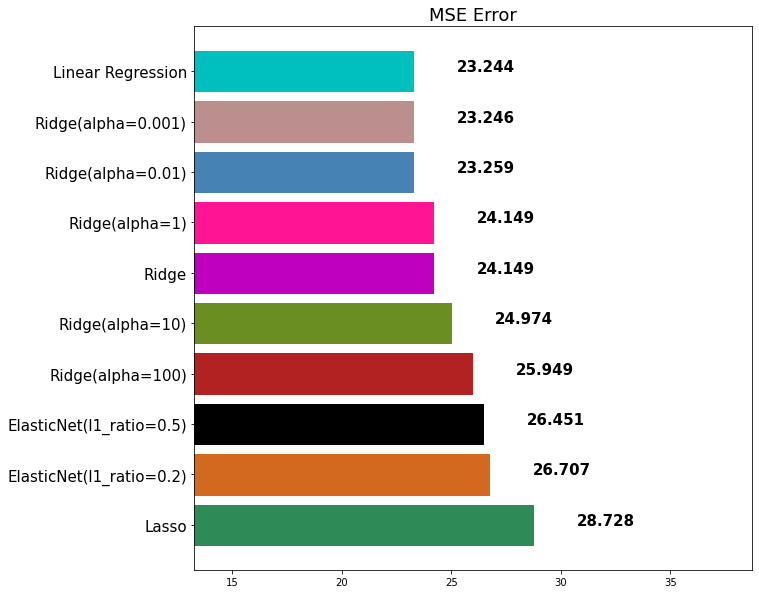

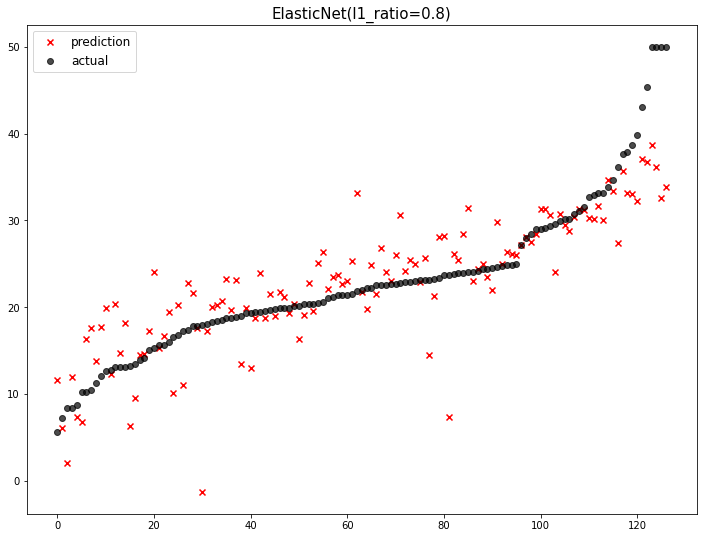

                       model        mse
0                      Lasso  28.727972
1   ElasticNet(l1_ratio=0.2)  26.707041
2   ElasticNet(l1_ratio=0.5)  26.450901
3   ElasticNet(l1_ratio=0.8)  26.057057
4           Ridge(alpha=100)  25.949184
5            Ridge(alpha=10)  24.973956
6                      Ridge  24.148842
7             Ridge(alpha=1)  24.148842
8          Ridge(alpha=0.01)  23.259342
9         Ridge(alpha=0.001)  23.245612
10         Linear Regression  23.244077


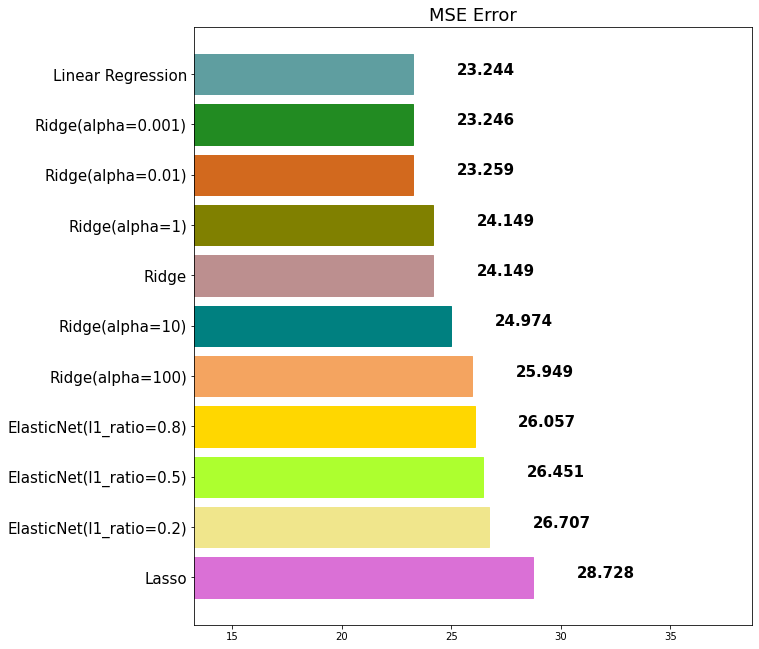

In [42]:
# ElasticNet
# l1_ratio : 1 (L1 규제만 사용)
# l1_ratio : 0 (L2 규제만 사용)
from sklearn.linear_model import ElasticNet
ratio = [0.2, 0.5, 0.8]
for r in ratio:
    model = ElasticNet(alpha=0.5, l1_ratio=r)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(r), pred, y_test)

### 스케일링

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.684349,11.858839,11.469314,0.073879,0.557026,6.269290,68.842744,3.758754,9.781003,415.744063,18.544855,358.548892,12.697889
std,8.118970,24.093359,6.895317,0.261919,0.115506,0.696735,28.120264,2.110328,8.807888,168.894007,2.163378,86.801323,7.126720
min,0.009060,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082645,0.000000,5.255000,0.000000,0.453000,5.878000,43.900000,2.064300,4.000000,280.500000,17.400000,375.780000,7.160000
50%,0.269380,0.000000,9.900000,0.000000,0.538000,6.195000,77.700000,3.099300,5.000000,352.000000,19.100000,391.500000,11.280000
75%,3.944055,12.500000,18.100000,0.000000,0.624000,6.630500,94.650000,5.116700,24.000000,666.000000,20.200000,396.660000,17.275000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [44]:
# StandardScaler
# 평균 : 0, 표준편차 : 1
sscaler = StandardScaler()
result = sscaler.fit_transform(x_train) # 실제는 x_train 전체가 아니라 원하는 것만 넣어야함, 현재는 모든 데이터가 전처리 되어있어서 가능하나, 관심있는것만 하는것이 좋음
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,-0.000106,0.002243,-0.000633,0.002216,0.000290,0.000396,0.000079,-0.000185,0.001319,-0.000765,0.001293,-0.000633,-0.000211
std,1.001039,1.000367,1.000513,1.000531,1.001569,1.001149,1.001637,1.001173,1.002697,0.999495,1.002585,1.001241,1.001265
min,-0.450000,-0.490000,-1.560000,-0.280000,-1.460000,-3.890000,-2.350000,-1.250000,-1.000000,-1.350000,-2.750000,-4.130000,-1.540000
25%,-0.440000,-0.490000,-0.900000,-0.280000,-0.900000,-0.560000,-0.890000,-0.800000,-0.660000,-0.800000,-0.530000,0.200000,-0.780000
50%,-0.420000,-0.490000,-0.230000,-0.280000,-0.160000,-0.110000,0.320000,-0.310000,-0.540000,-0.380000,0.260000,0.380000,-0.200000
75%,0.030000,0.030000,0.960000,-0.280000,0.580000,0.520000,0.920000,0.640000,1.620000,1.480000,0.770000,0.440000,0.640000
max,8.610000,3.660000,2.360000,3.540000,2.720000,3.500000,1.110000,3.300000,1.620000,1.750000,1.600000,0.440000,3.550000


In [48]:
# MinMaxScaler
# 0~1 사이로 정규화
sscaler = MinMaxScaler()
result = sscaler.fit_transform(x_train)
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.049446,0.118470,0.396121,0.073879,0.348971,0.526728,0.679129,0.274406,0.380792,0.434802,0.632084,0.903298,0.302612
std,0.110583,0.240814,0.254734,0.261919,0.239824,0.135195,0.289492,0.220301,0.383448,0.321023,0.230529,0.218783,0.196673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.165000,0.000000,0.130000,0.450000,0.425000,0.100000,0.130000,0.180000,0.510000,0.950000,0.150000
50%,0.000000,0.000000,0.340000,0.000000,0.310000,0.510000,0.770000,0.210000,0.170000,0.310000,0.690000,0.990000,0.260000
75%,0.050000,0.120000,0.640000,0.000000,0.490000,0.600000,0.945000,0.420000,1.000000,0.910000,0.810000,1.000000,0.430000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# RobustScaler
# 중앙값 : 0, IQR : 1
# 이상치(Outlier) 처리에 유용함
sscaler = RobustScaler()
result = sscaler.fit_transform(x_train)
round(pd.DataFrame(result), 2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.884459,0.948707,0.122058,0.073879,0.110897,0.098918,-0.174670,0.216016,0.239050,0.163879,-0.198707,-1.577625,0.140211
std,2.102517,1.927469,0.537050,0.261919,0.675591,0.925858,0.554223,0.691235,0.440394,0.436282,0.771797,4.157167,0.704513
min,-0.070000,0.000000,-0.710000,0.000000,-0.870000,-3.500000,-1.470000,-0.650000,-0.200000,-0.430000,-2.320000,-18.730000,-0.940000
25%,-0.050000,0.000000,-0.365000,0.000000,-0.500000,-0.420000,-0.670000,-0.340000,-0.050000,-0.185000,-0.610000,-0.755000,-0.410000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.955000,1.000000,0.640000,0.000000,0.500000,0.580000,0.330000,0.660000,0.950000,0.810000,0.390000,0.250000,0.590000
max,18.970000,8.000000,1.390000,1.000000,1.950000,3.330000,0.440000,2.490000,0.950000,0.930000,1.040000,0.260000,2.640000


### 파이프라인

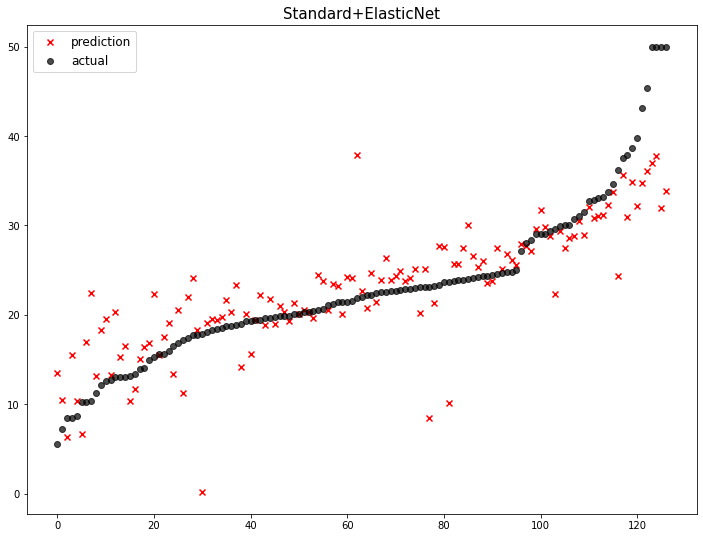

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9          Ridge(alpha=0.01)  23.259342
10        Ridge(alpha=0.001)  23.245612
11         Linear Regression  23.244077


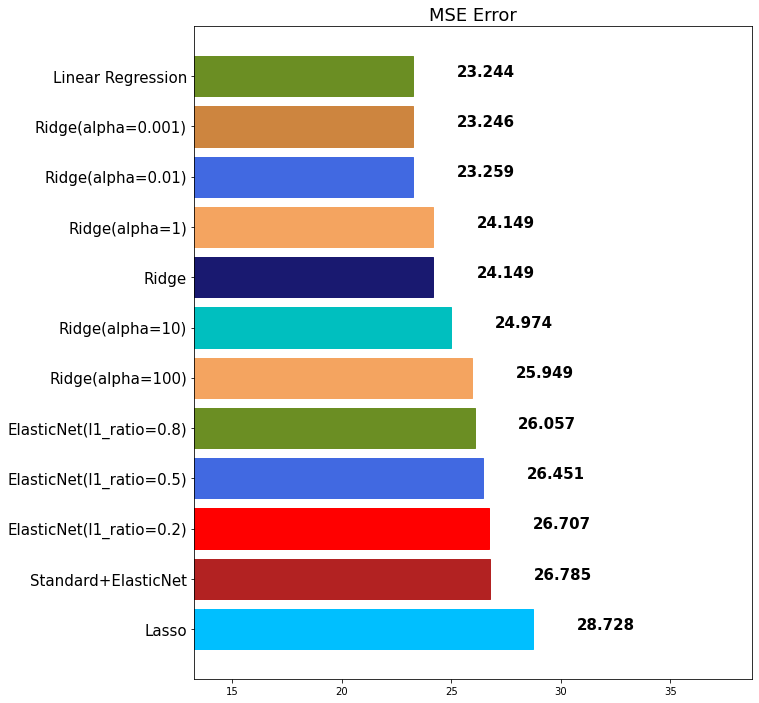

In [50]:
from sklearn.pipeline import make_pipeline
# stdscaler + elasticnet
ep = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.8))
ep.fit(x_train, y_train)
pred = ep.predict(x_test)
mse_eval('Standard+ElasticNet', pred, y_test)

### Polynomial Features
* 다항식 계수를 사용해서 새로운 feature 생성 (feature들간에 상호작용)
* feature : a, b (degree=2) -> (1, a, b, aa, ab, bb)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(x_train)[0]

array([1.00000000e+00, 1.54450000e-01, 2.50000000e+01, 5.13000000e+00,
       0.00000000e+00, 4.53000000e-01, 6.14500000e+00, 2.92000000e+01,
       7.81480000e+00, 8.00000000e+00, 2.84000000e+02, 1.97000000e+01,
       3.90680000e+02, 6.86000000e+00, 2.38548025e-02, 3.86125000e+00,
       7.92328500e-01, 0.00000000e+00, 6.99658500e-02, 9.49095250e-01,
       4.50994000e+00, 1.20699586e+00, 1.23560000e+00, 4.38638000e+01,
       3.04266500e+00, 6.03405260e+01, 1.05952700e+00, 6.25000000e+02,
       1.28250000e+02, 0.00000000e+00, 1.13250000e+01, 1.53625000e+02,
       7.30000000e+02, 1.95370000e+02, 2.00000000e+02, 7.10000000e+03,
       4.92500000e+02, 9.76700000e+03, 1.71500000e+02, 2.63169000e+01,
       0.00000000e+00, 2.32389000e+00, 3.15238500e+01, 1.49796000e+02,
       4.00899240e+01, 4.10400000e+01, 1.45692000e+03, 1.01061000e+02,
       2.00418840e+03, 3.51918000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

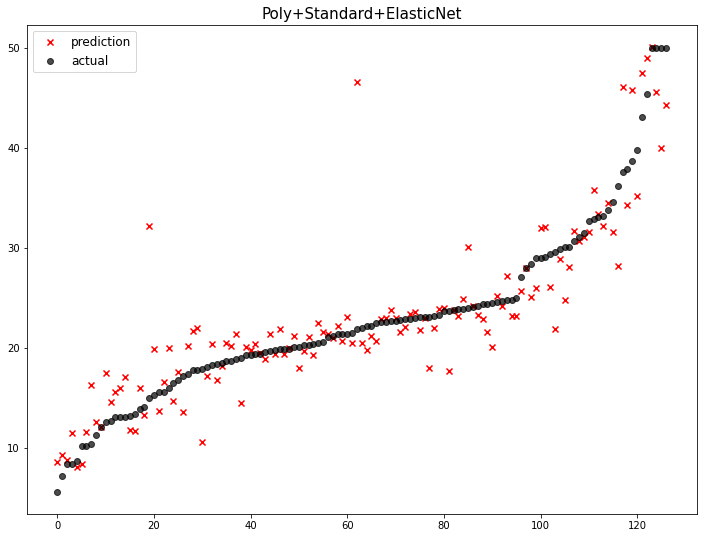

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13              RandomForest  15.750974
14  Poly+Standard+ElasticNet  15.645932
15                  Stacking  15.645932
16                      LGBM  15.217834
17    RandomForest by Tuning  14.417986
18          GradientBoosting  13.231603
19                   XGBoost  12.748210
20         XGBoost by Tuning  12.001338


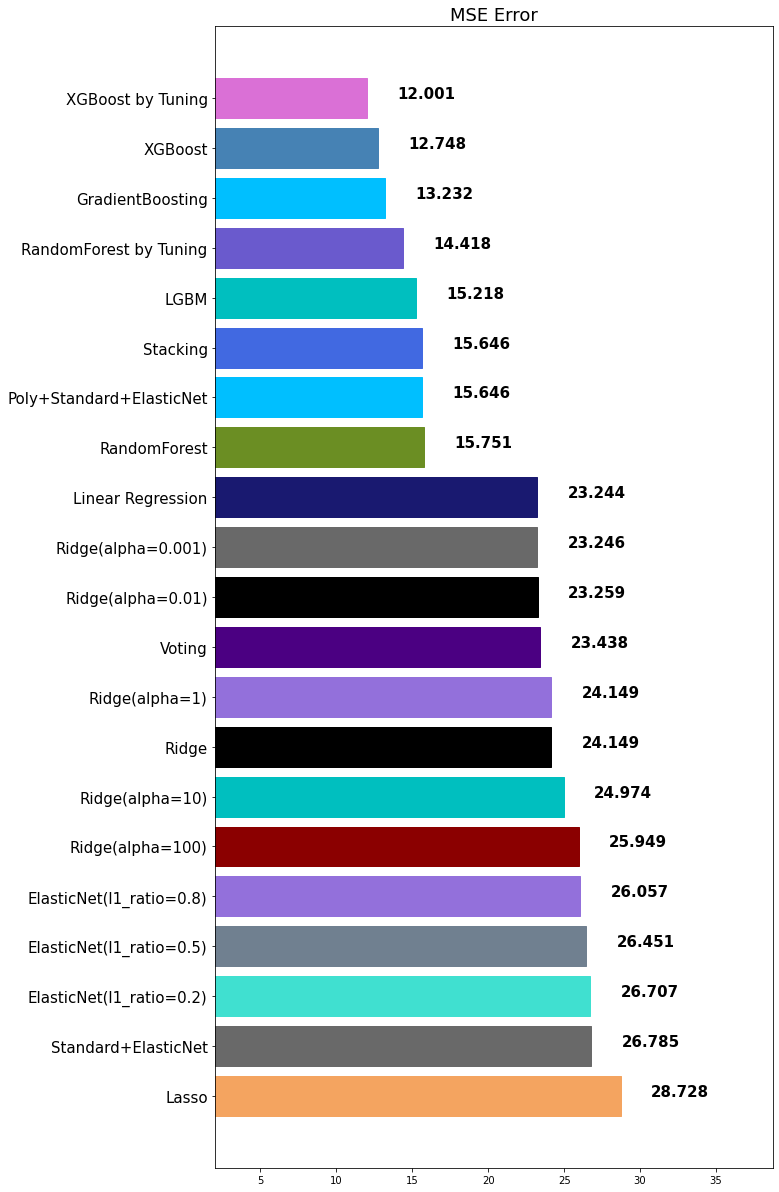

In [71]:
# polynomial + scaler + elasticNet
ep = make_pipeline(PolynomialFeatures(degree=2),
                   StandardScaler(), 
                   ElasticNet(alpha=0.5, l1_ratio=0.8))
ep.fit(x_train, y_train)
ep_pred = ep.predict(x_test)
mse_eval('Poly+Standard+ElasticNet', pred, y_test)

### 앙상블(Ensemble)
여러 머신러닝 모델들을 이용해서 최적의 답을 찾아내는 기법

#### 종류
* voting(보팅) : 투표를 통해 결과 (다른 모델)
* bagging(배깅) : 샘플 중복 생성을 통해 결과 (하나의 모델, 샘플이 여러개)
* boosting(부스팅) : 이전 오차를 보완해나가는 형태
* stacking(스태킹) : 여러 모델들이 예측한 결과를 다시 학습해서 최종 예측

In [54]:
from sklearn.ensemble import VotingRegressor
models = [
    ('LR', LinearRegression()),
    ('Ridge', ridge),
    ('Lasso', lasso),
    ('ep', ep)
]
vr = VotingRegressor(models)

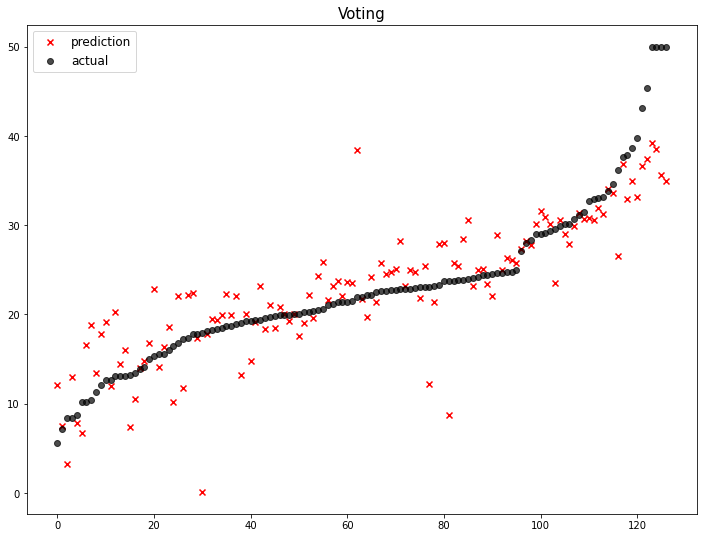

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  22.714655


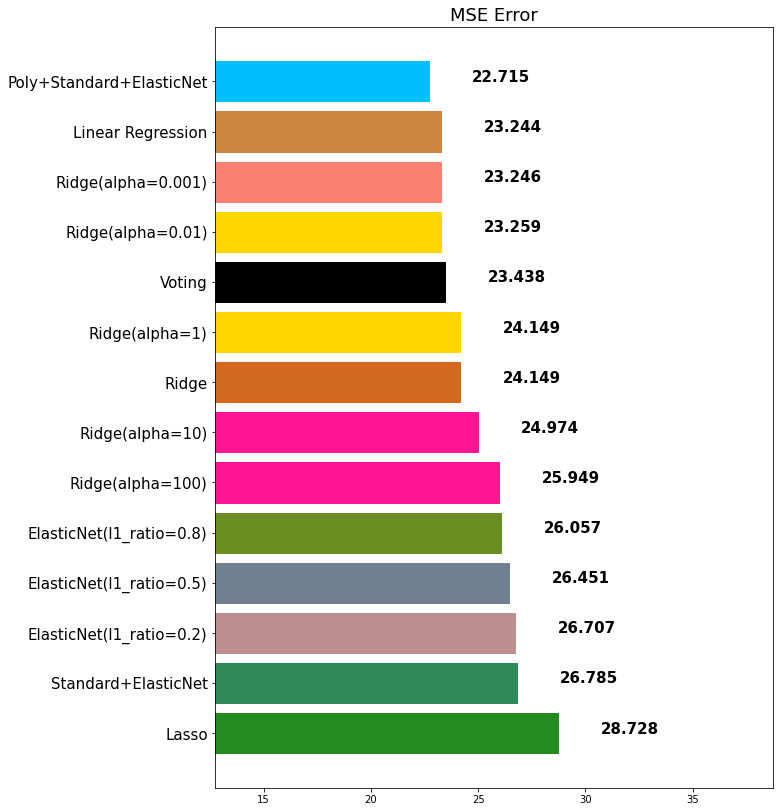

In [55]:
vr.fit(x_train, y_train)
pred = vr.predict(x_test)
mse_eval('Voting', pred, y_test)

### RandomForest
* DT(트리) 기반의 배깅 모델
* 단일모델로 여러개의 샘플 조합

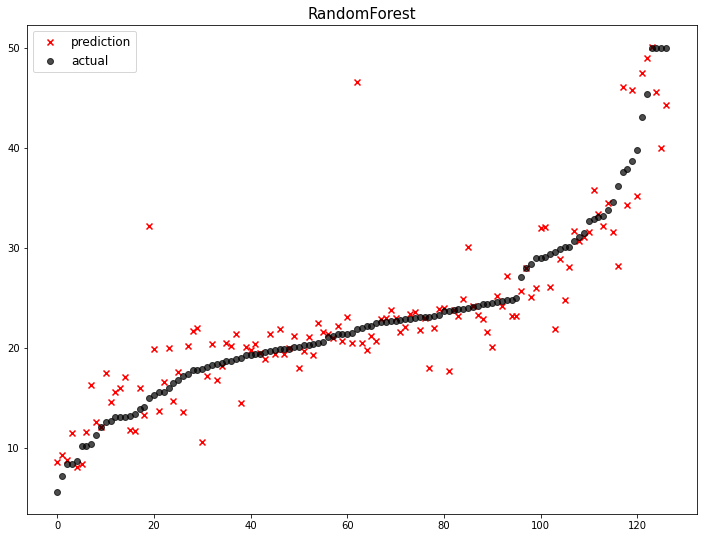

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  15.645932
14              RandomForest  15.645932
15                  Stacking  15.645932
16                      LGBM  15.217834
17    RandomForest by Tuning  14.417986
18          GradientBoosting  13.231603
19                   XGBoost  12.748210
20         XGBoost by Tuning  12.001338


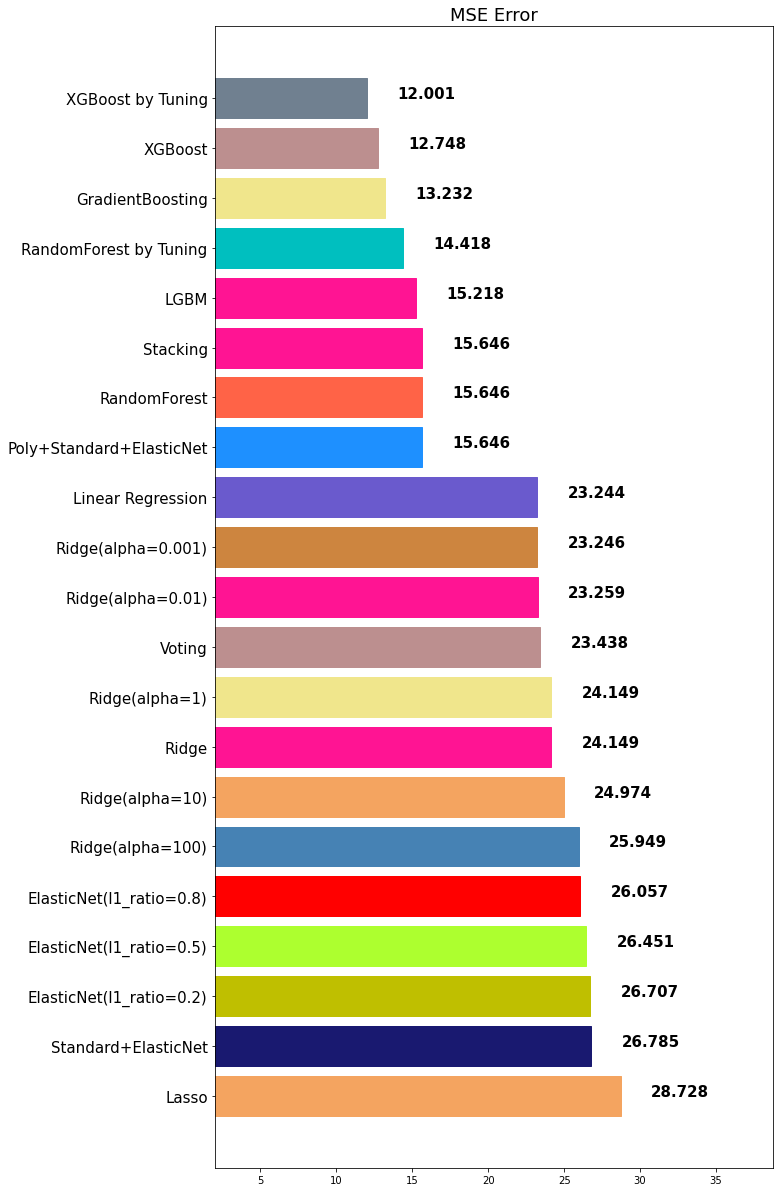

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
mse_eval('RandomForest', pred, y_test)

#### 자주 사용하는 파라미터
* n_estimators : 트리 갯수
* random_state : 랜덤 시드값
* n_jobs : CPU 사용갯수 지정 (-1:전체)
* max_depth : 최대깊이 (과적합 감소)
* max_features : 최대 feature 개수 (과적합 감소)
* max_sample_split : 분할시 최대 샘플개수 (과적합 감소)

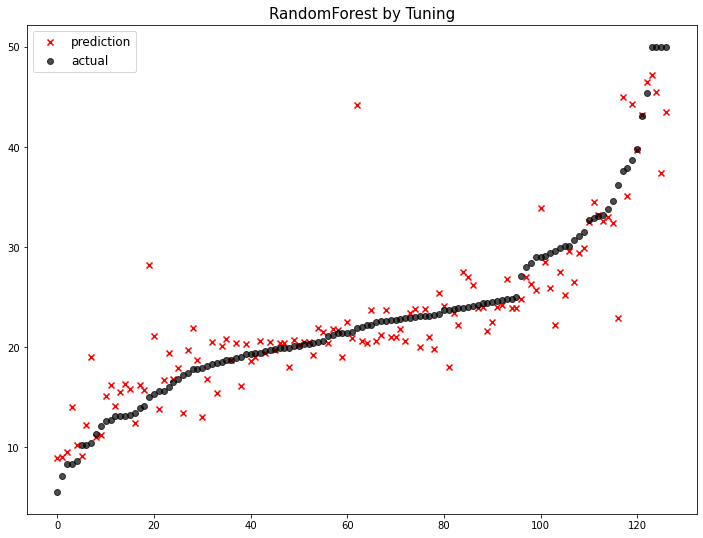

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  22.714655
14              RandomForest  15.750974
15    RandomForest by Tuning  14.417986


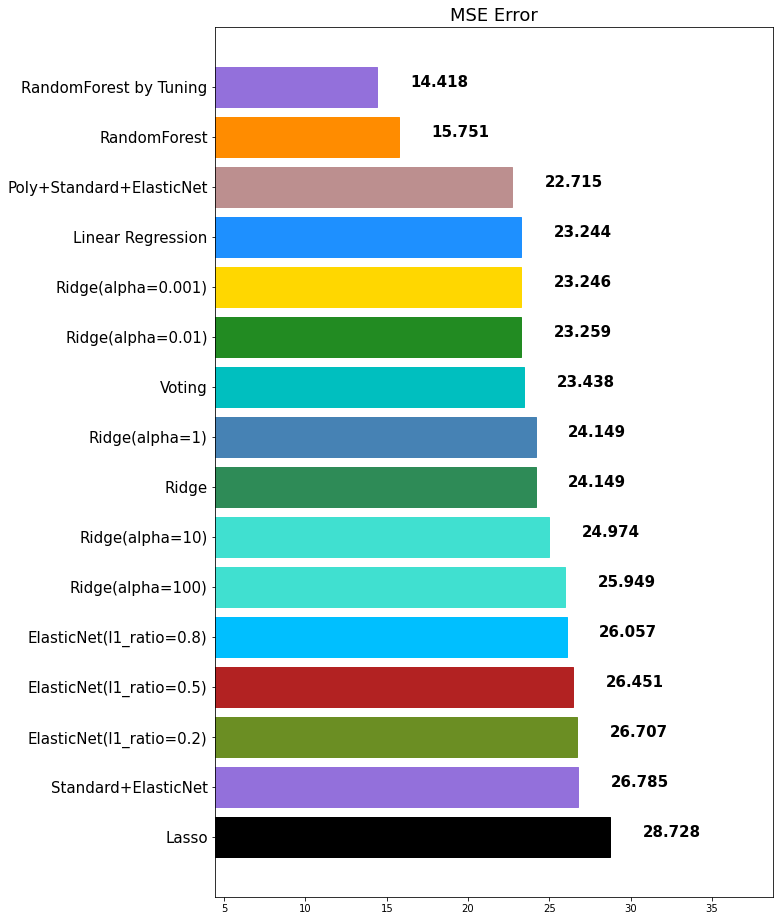

In [60]:
rfg = RandomForestRegressor(n_estimators=1000, max_depth=7, max_features=0.9, 
                            n_jobs=-1)
rfg.fit(x_train, y_train)
pred = rfg.predict(x_test)
mse_eval('RandomForest by Tuning', pred, y_test)

### boosting
* 이전에 학습한 예측값 중 잘못 예측한 값(오차)를 보완해나가는 방식
* 장점 : 성능이 우수
* 단점 : 보완해 나가는 방식이므로, 이상치에 민감하고, 학습시간이 오래걸림

#### 대표적인 부스팅 모델
* AdaBoost
* GradientBoost
* LightGBM
* XGBoost

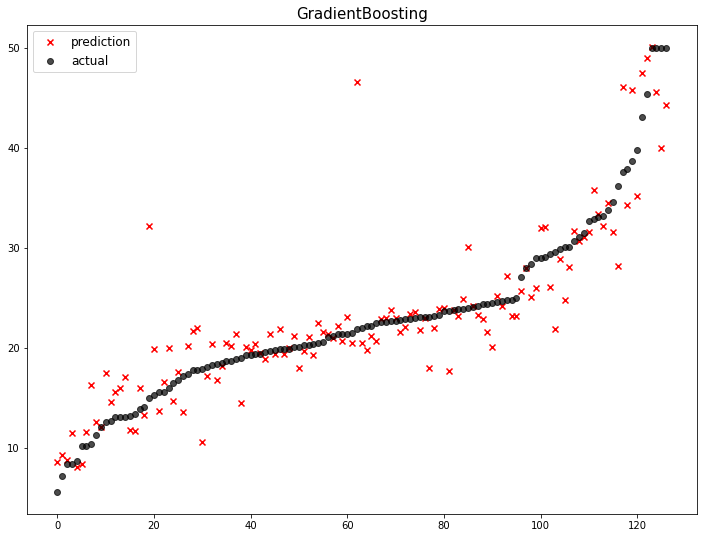

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  15.645932
14              RandomForest  15.645932
15          GradientBoosting  15.645932
16                  Stacking  15.645932
17                      LGBM  15.217834
18    RandomForest by Tuning  14.417986
19                   XGBoost  12.748210
20         XGBoost by Tuning  12.001338


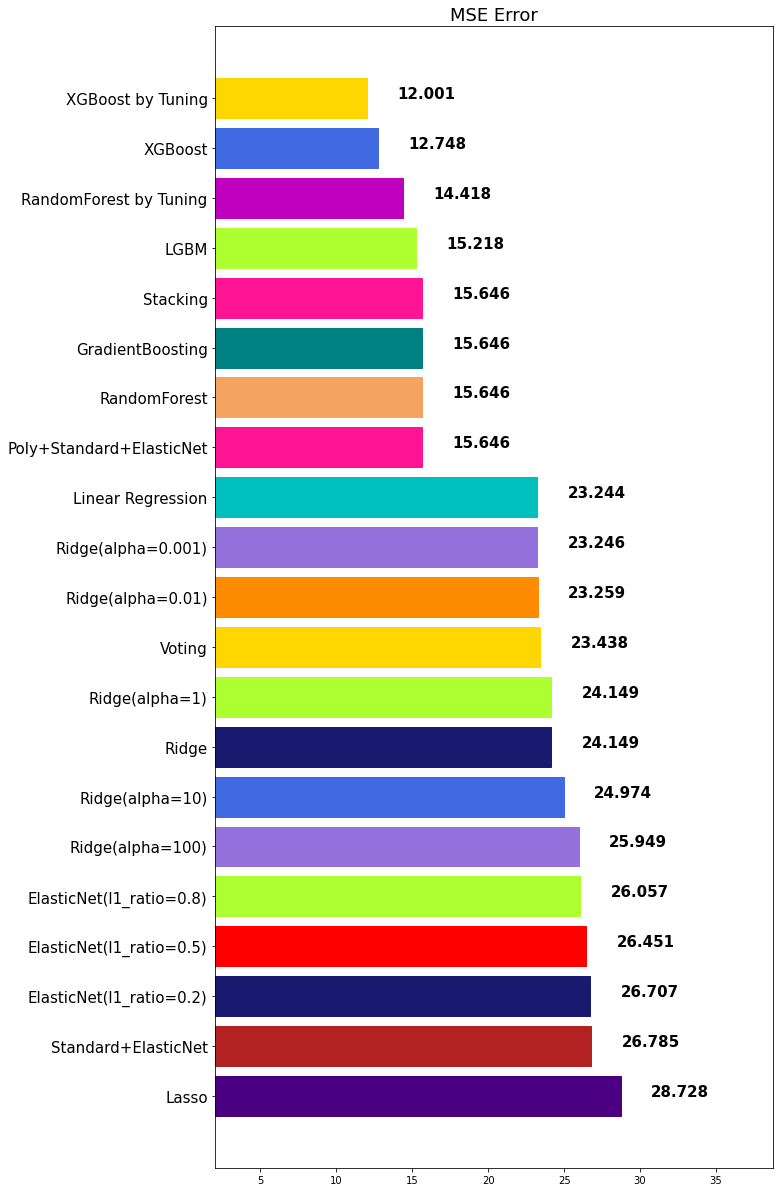

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoosting', pred, y_test)

### XGBoost
* 성능이 우수
* 사이킷런에 없음(별도 설치 필요)


In [62]:
!pip install xgboost

In [63]:
from xgboost import XGBRegressor

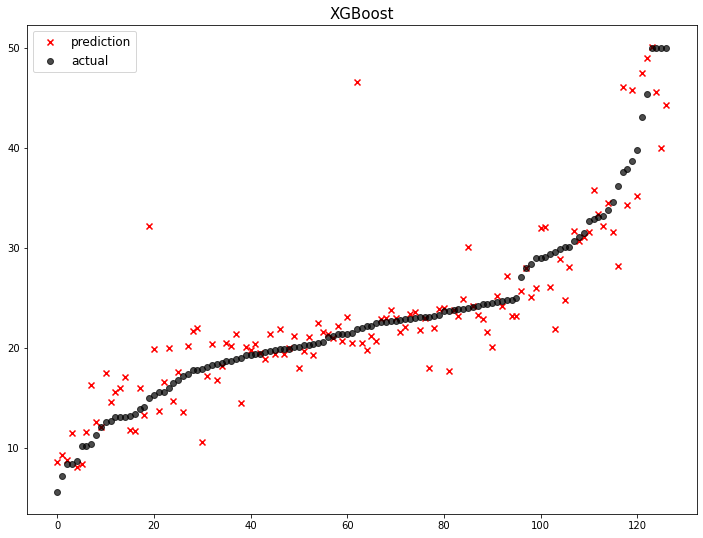

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  15.645932
14              RandomForest  15.645932
15          GradientBoosting  15.645932
16                   XGBoost  15.645932
17                  Stacking  15.645932
18                      LGBM  15.217834
19    RandomForest by Tuning  14.417986
20         XGBoost by Tuning  12.001338


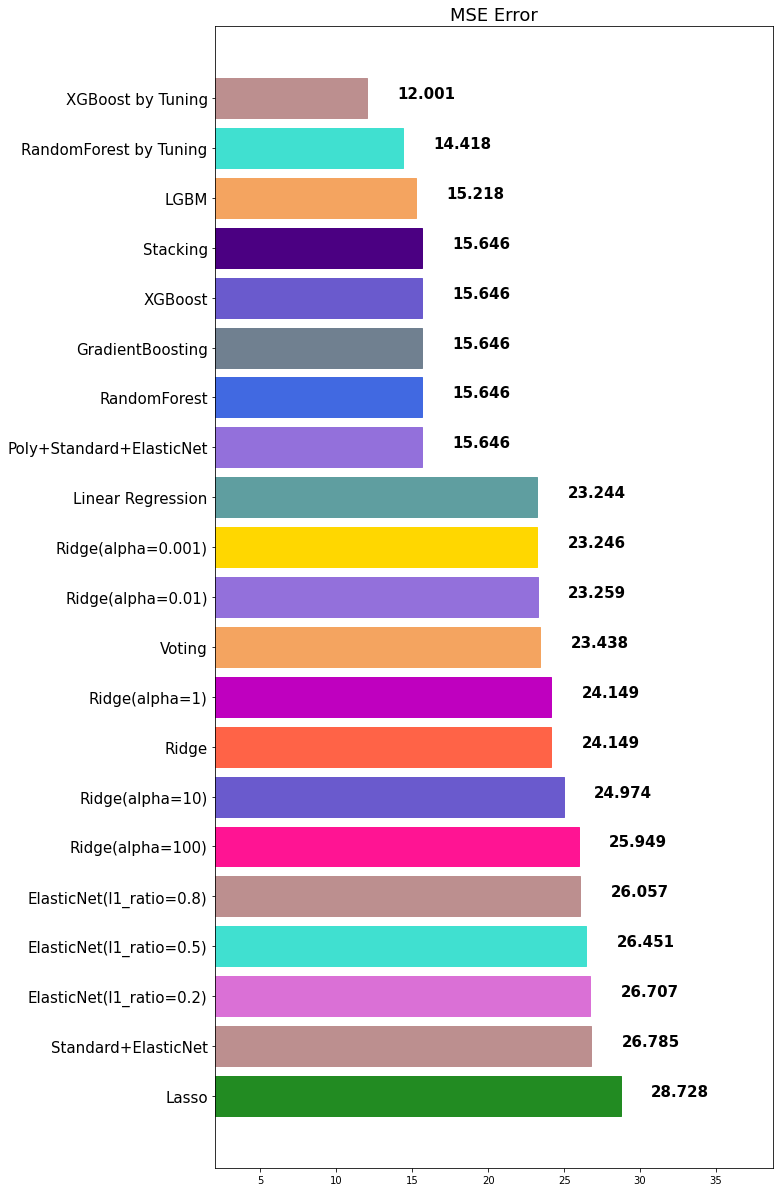

In [74]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', pred, y_test)

[16:11:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




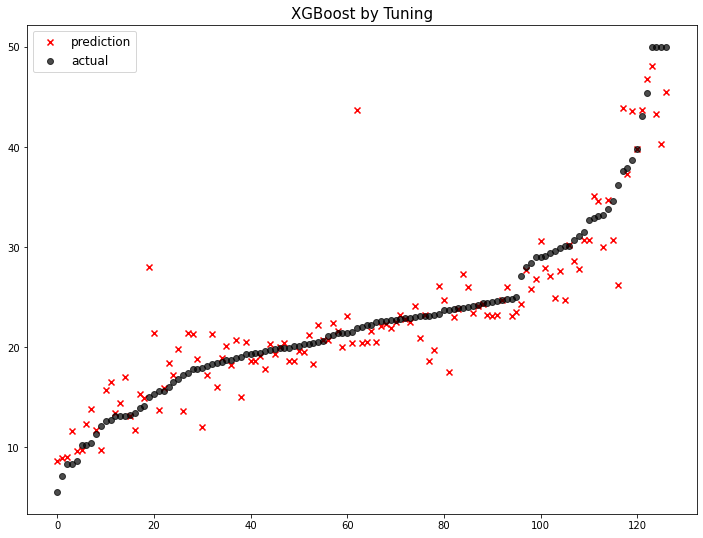

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  22.714655
14              RandomForest  15.750974
15    RandomForest by Tuning  14.417986
16          GradientBoosting  13.231603
17                   XGBoost  12.748210
18         XGBoost by Tuning  12.001338


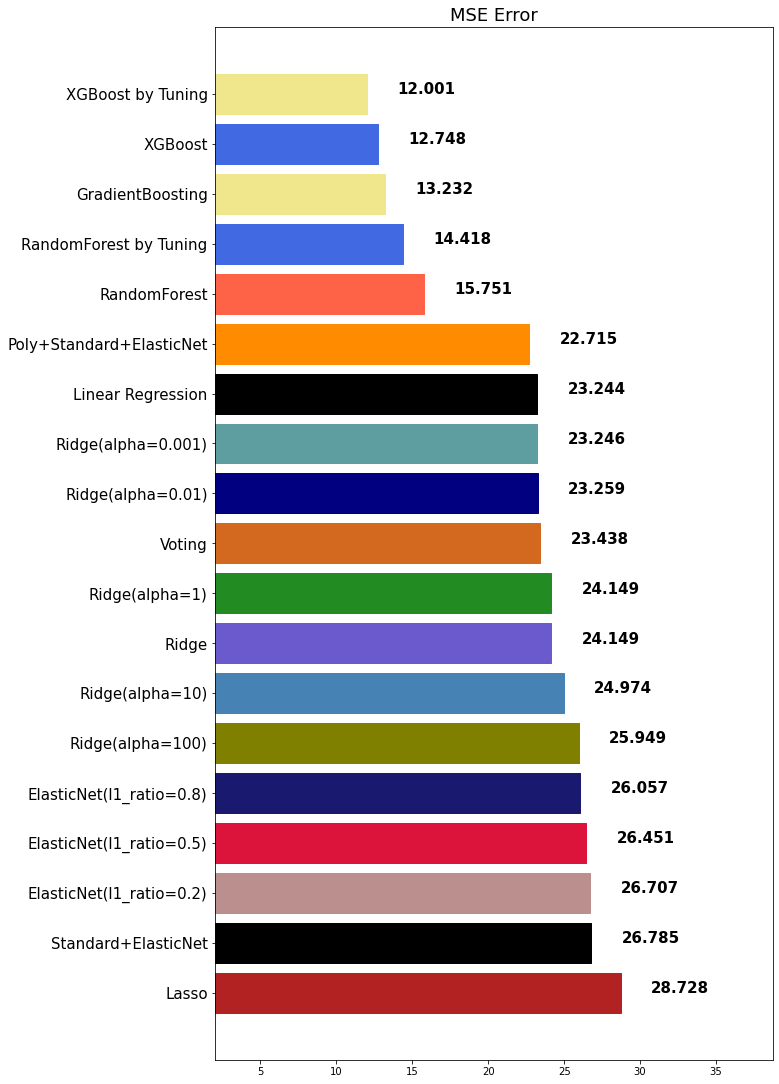

In [65]:
xgb = XGBRegressor(n_jobs=-1, n_estimators=1000, max_depth=7, max_features=0.8, 
                  subsample=0.8, learning_rate=0.01)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
mse_eval('XGBoost by Tuning', pred, y_test)

### LightGBM
* 성능도 좋은 편, 속도도 빠른 편
* 사이킷런에 없음

In [66]:
!pip install lightgbm

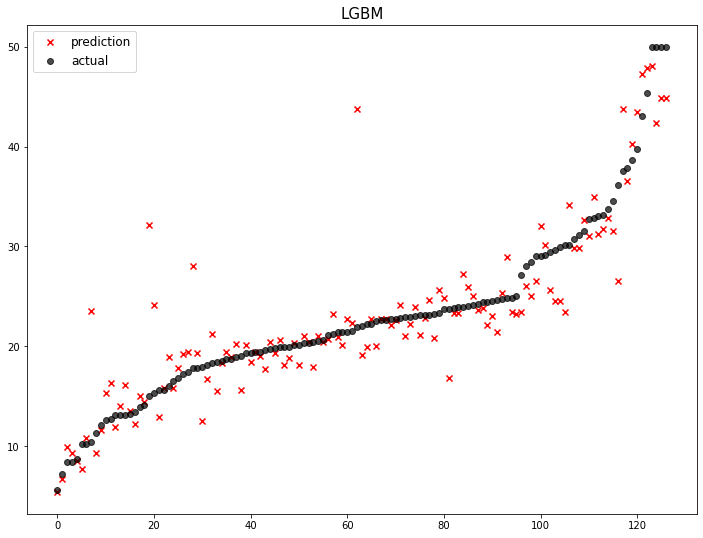

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  22.714655
14              RandomForest  15.750974
15                      LGBM  15.217834
16    RandomForest by Tuning  14.417986
17          GradientBoosting  13.231603
18                   XGBoost  12.748210
19         XGBoost by Tuning  12.001338


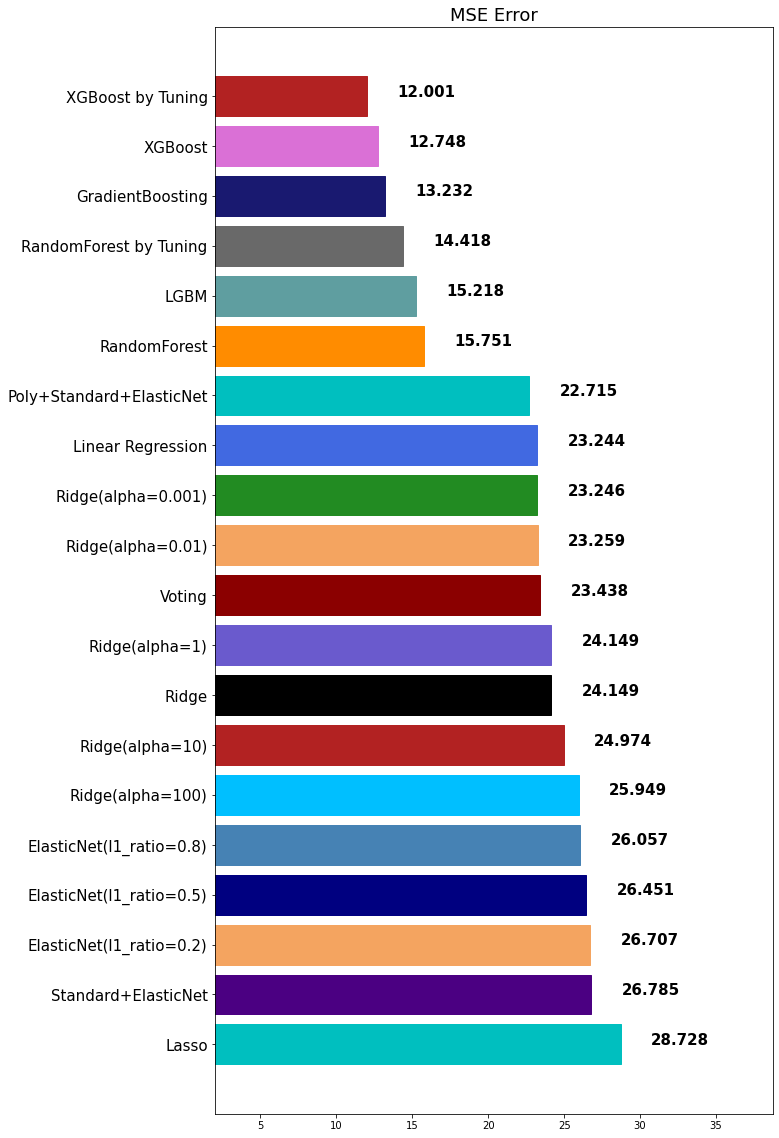

In [67]:
from lightgbm import LGBMRegressor
lg = LGBMRegressor()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
mse_eval('LGBM', pred, y_test)

### Stacking
개별 모델들이 예측한 결과를 가지고 최종 학습 예측
- 성능을 최대한 올려야하는 경우
- 과적합 유발 가능성 높음


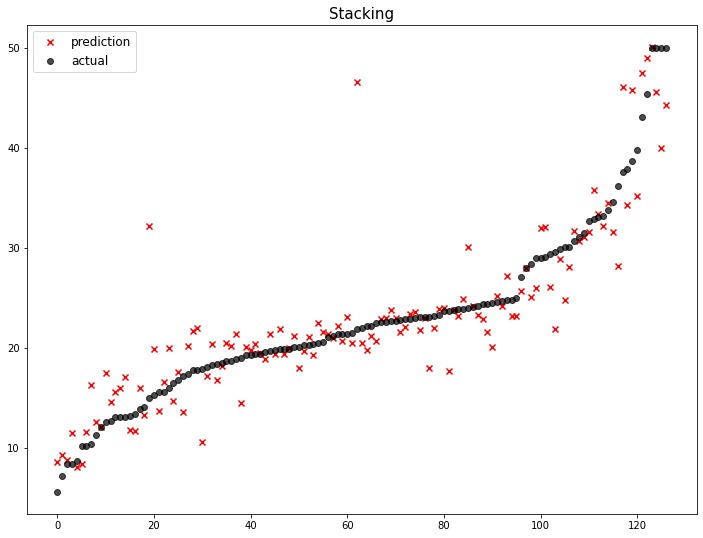

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  15.645932
14              RandomForest  15.645932
15          GradientBoosting  15.645932
16                   XGBoost  15.645932
17                  Stacking  15.645932
18                      LGBM  15.217834
19    RandomForest by Tuning  14.417986
20         XGBoost by Tuning  12.001338


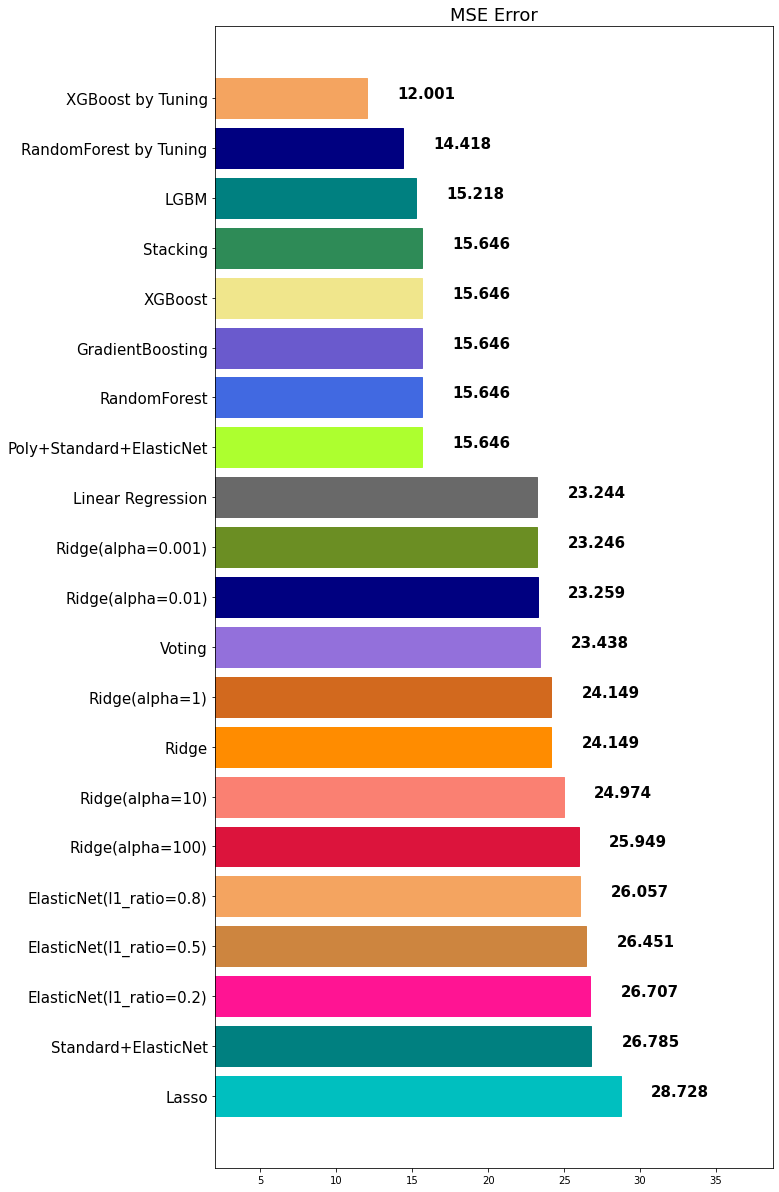

In [75]:
from sklearn.ensemble import StackingRegressor
models = [
    ('ep', ep), 
    ('rf', rfg),
    ('gbr', gbr),
    ('lg', lg)
]
stack = StackingRegressor(models, final_estimator=xgb, n_jobs=-1)
stack.fit(x_train, y_train)
stack_pred = stack.predict(x_test)
mse_eval('Stacking', pred, y_test)

### Weighted Blending
* 각 모델들의 예측값에 가중치(weight)값을 지정
* 가중치의 합은 1

In [82]:
# 각 모델들이 예측한 예측값
models = {
    'ep' : ep_pred,
    'rf' : rfg_pred,
    'gbr' : gbr_pred,
    'xgb' : xgb_pred,
    'stacking' : stack_pred
}
# 각 예측값 별로 가중치를 곱 (가중치의 합은 1)
final_pred = models['ep']*0.05\
+ models['rf']*0.2\
+ models['gbr']*0.3\
+ models['xgb']*0.3\
+ models['stacking']*0.15


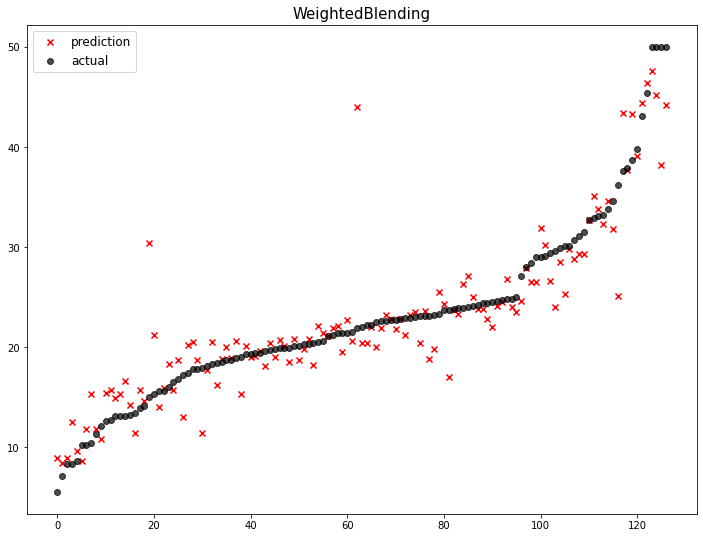

                       model        mse
0                      Lasso  28.727972
1        Standard+ElasticNet  26.785037
2   ElasticNet(l1_ratio=0.2)  26.707041
3   ElasticNet(l1_ratio=0.5)  26.450901
4   ElasticNet(l1_ratio=0.8)  26.057057
5           Ridge(alpha=100)  25.949184
6            Ridge(alpha=10)  24.973956
7                      Ridge  24.148842
8             Ridge(alpha=1)  24.148842
9                     Voting  23.438140
10         Ridge(alpha=0.01)  23.259342
11        Ridge(alpha=0.001)  23.245612
12         Linear Regression  23.244077
13  Poly+Standard+ElasticNet  15.645932
14              RandomForest  15.645932
15          GradientBoosting  15.645932
16                   XGBoost  15.645932
17                  Stacking  15.645932
18                      LGBM  15.217834
19    RandomForest by Tuning  14.417986
20          WeightedBlending  12.944102
21         XGBoost by Tuning  12.001338


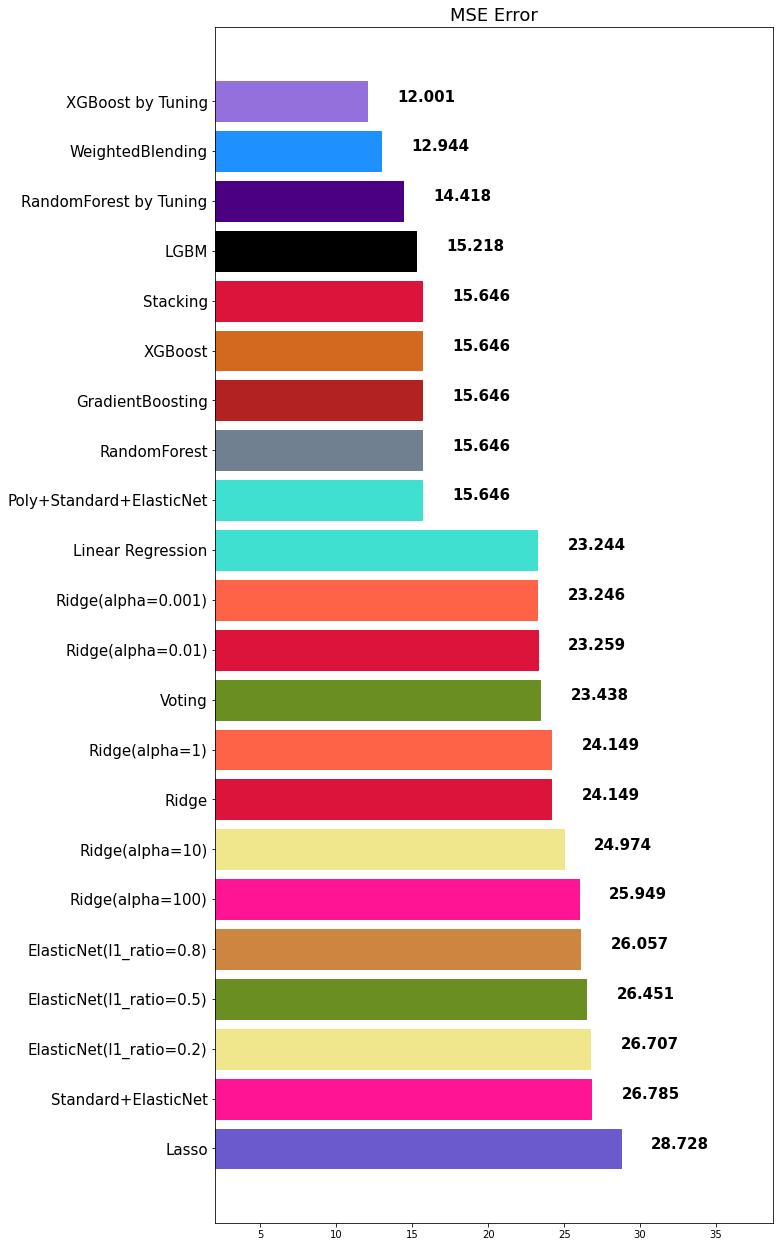

In [83]:
mse_eval('WeightedBlending', final_pred, y_test)